In [1]:
# Installing gdown
!pip install -U --no-cache-dir gdown --pre

# Drive Link
# https://drive.google.com/file/d/1JqeVC7BJllTTsVAQv1KS2uIFS7Iq_Upf/view?usp=sharing

# Downloaading dataset
!gdown 1JqeVC7BJllTTsVAQv1KS2uIFS7Iq_Upf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1JqeVC7BJllTTsVAQv1KS2uIFS7Iq_Upf
To: /content/archive.zip
100% 181M/181M [00:00<00:00, 188MB/s]


In [2]:
!rm -rf sample_data
!unzip archive.zip
!rm archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: annotations/annotations_YOLO/2019-03-19_19-56-16to2019-03-19_19-56-24_1-0080.txt  
  inflating: annotations/annotations_YOLO/2019-03-19_19-56-16to2019-03-19_19-56-24_1-0081.txt  
  inflating: annotations/annotations_YOLO/2019-03-19_19-56-16to2019-03-19_19-56-24_1-0082.txt  
  inflating: annotations/annotations_YOLO/2019-03-19_19-56-16to2019-03-19_19-56-24_1-0083.txt  
  inflating: annotations/annotations_YOLO/2019-03-19_19-56-16to2019-03-19_19-56-24_1-0084.txt  
  inflating: annotations/annotations_YOLO/2019-03-19_19-56-16to2019-03-19_19-56-24_1-0085.txt  
  inflating: annotations/annotations_YOLO/2019-03-19_19-56-16to2019-03-19_19-56-24_1-0086.txt  
  inflating: annotations/annotations_YOLO/2019-03-19_19-56-16to2019-03-19_19-56-24_1-0087.txt  
  inflating: annotations/annotations_YOLO/2019-03-19_19-56-16to2019-03-19_19-56-24_1-0088.txt  
  inflating: annotations/annotations_YOLO/2019-03-19_19-56-16to2019-03-19_19-56-24_1-

In [3]:
!sudo pip install ipdb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.3/793.3 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 KB 39.3 MB/s eta 0:00:00
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 2.0.10
    Uninstalling prompt-toolkit-2.0.10:
      Successfully uninstalled prompt-toolkit-2.0.10
  Attempting uninstall: ipython
    Found existing installation: ipython 7.9.0
    Uninstalling ipython-7.9.0:
      Successfully uninstalled ipython-7.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython 8.11.0 which is incompatible.


In [4]:
# let us clean
%cd /content/
!mv /content/annotations/annotations_YOLO /content/
!rm -rf annotations
!rm *.txt
!mv annotations_YOLO annots
!mv /content/scripts/frameExtractor.py /content/
!rm -rf scripts

/content


In [5]:
import os
# filename = "2019-02-22_22-31-28to2019-02-22_22-31-38_1"
# os.system('ffmpeg -i /content/dataset/videos/crab/{}.avi -vf scale=960:540 -sws_flags bicubic {}-%04d.png -hide_banner'.format(filename,filename))


In [6]:
!mkdir images


In [7]:
!mkdir videos
!mv /content/dataset/videos/*/* /content/videos

In [8]:
!rm -rf dataset

In [9]:
%cd images
import os
for eachfile in os.listdir("/content/videos"):
  filename = eachfile[:-4]
  os.system('ffmpeg -i /content/videos/{}.avi -vf scale=960:540 -sws_flags bicubic {}-%04d.jpg -hide_banner'.format(filename,filename))

/content/images


In [10]:
%cd /content/
!rm -rf videos

/content


In [11]:
!rm frameExtractor.py

In [12]:
# check whether all files coexist in each folder

import os

# Set the paths to the two folders
folder1 = "annots"
folder2 = "images"

# Get the list of files in each folder
files1 = [os.path.splitext(f)[0] for f in os.listdir(folder1) if os.path.isfile(os.path.join(folder1, f))]
files2 = [os.path.splitext(f)[0] for f in os.listdir(folder2) if os.path.isfile(os.path.join(folder2, f))]

# Compare the lists of file names ignoring extensions
common_files = set([f1 for f1 in files1 for f2 in files2 if f1 == f2])
if len(common_files) > 0:
    print("The following files exist in both folders")
    for f in common_files:
        # print(f)
        continue
else:
    print("No common files found.")


The following files exist in both folders


In [13]:
import os

# Set the paths to the two folders
images_folder = "images"
annotations_folder = "annots"

# Get the list of files in each folder
image_files = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]
annotation_files = [f for f in os.listdir(annotations_folder) if os.path.isfile(os.path.join(annotations_folder, f))]

# Sort the file lists by name to ensure consistent ordering
image_files.sort()
annotation_files.sort()

# Rename the files in both folders
for i, (image_file, annotation_file) in enumerate(zip(image_files, annotation_files), start=1):
    # Create new file names with a numeric sequence
    new_image_file = f"{i}.png"
    new_annotation_file = f"{i}.txt"

    # Rename the files in the 'images' folder
    os.rename(os.path.join(images_folder, image_file), os.path.join(images_folder, new_image_file))

    # Rename the files in the 'annotations' folder
    os.rename(os.path.join(annotations_folder, annotation_file), os.path.join(annotations_folder, new_annotation_file))

    # Print the original and new file names for each file
    print(f"Renamed '{image_file}' to '{new_image_file}' in the 'images' folder.")
    print(f"Renamed '{annotation_file}' to '{new_annotation_file}' in the 'annotations' folder.")


Streaming output truncated to the last 5000 lines.
Renamed '2019-03-20_23-54-24to2019-03-20_23-54-35_1-0056.jpg' to '12585.png' in the 'images' folder.
Renamed '2019-03-20_23-54-24to2019-03-20_23-54-35_1-0056.txt' to '12585.txt' in the 'annotations' folder.
Renamed '2019-03-20_23-54-24to2019-03-20_23-54-35_1-0057.jpg' to '12586.png' in the 'images' folder.
Renamed '2019-03-20_23-54-24to2019-03-20_23-54-35_1-0057.txt' to '12586.txt' in the 'annotations' folder.
Renamed '2019-03-20_23-54-24to2019-03-20_23-54-35_1-0058.jpg' to '12587.png' in the 'images' folder.
Renamed '2019-03-20_23-54-24to2019-03-20_23-54-35_1-0058.txt' to '12587.txt' in the 'annotations' folder.
Renamed '2019-03-20_23-54-24to2019-03-20_23-54-35_1-0059.jpg' to '12588.png' in the 'images' folder.
Renamed '2019-03-20_23-54-24to2019-03-20_23-54-35_1-0059.txt' to '12588.txt' in the 'annotations' folder.
Renamed '2019-03-20_23-54-24to2019-03-20_23-54-35_1-0060.jpg' to '12589.png' in the 'images' folder.
Renamed '2019-03-20_

In [14]:
# check whether all files coexist in each folder

import os

# Set the paths to the two folders
folder1 = "annots"
folder2 = "images"

# Get the list of files in each folder
files1 = [os.path.splitext(f)[0] for f in os.listdir(folder1) if os.path.isfile(os.path.join(folder1, f))]
files2 = [os.path.splitext(f)[0] for f in os.listdir(folder2) if os.path.isfile(os.path.join(folder2, f))]

# Compare the lists of file names ignoring extensions
common_files = set([f1 for f1 in files1 for f2 in files2 if f1 == f2])
if len(common_files) > 0:
    print("The following files exist in both folders:")
    for f in common_files:
        # print(f)
        continue
else:
    print("No common files found.")


The following files exist in both folders:


In [15]:
# !mv annots labels
import os
os.rename("annots", "labels")

In [16]:
%cd images

/content/images


In [17]:
!sudo apt-get install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libgs9 libgs9-common libidn11 libijs-0.35 libjbig2dec0 liblqr-1-0
  libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra libmagickwand-6.q16-6
  libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch inkscape libjxr-tools libwmf0.2-7-gtk
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be

In [18]:
!mogrify

Version: ImageMagick 6.9.10-23 Q16 x86_64 20190101 https://imagemagick.org
Copyright: © 1999-2019 ImageMagick Studio LLC
License: https://imagemagick.org/script/license.php
Features: Cipher DPC Modules OpenMP 
Delegates (built-in): bzlib djvu fftw fontconfig freetype jbig jng jpeg lcms lqr ltdl lzma openexr pangocairo png tiff webp wmf x xml zlib
Usage: mogrify-im6.q16 [options ...] file [ [options ...] file ...]

Image Settings:
  -adjoin              join images into a single multi-image file
  -affine matrix       affine transform matrix
  -alpha option        activate, deactivate, reset, or set the alpha channel
  -antialias           remove pixel-aliasing
  -authenticate password
                       decipher image with this password
  -attenuate value     lessen (or intensify) when adding noise to an image
  -background color    background color
  -bias value          add bias when convolving an image
  -black-point-compensation
                       use black point compensati

In [19]:
!pwd

/content/images


In [20]:
%cd /content/
os.rename("images", "pngs")
!mkdir images
%cd pngs


/content
/content/pngs


In [21]:
!mogrify -path /content/images -format jpg *.png

In [22]:
%cd /content/

/content


In [23]:
!ls

images	labels	pngs


In [24]:
# Normalise the coordinates

In [25]:
!ls /content/labels | wc -l

15084


In [26]:
!ls /content/images | wc -l

15084


In [27]:
!cp -r labels labels_backup

In [28]:
!pwd

/content


In [29]:
# for eachfile in os.listdir("/content/labels/"):
#   path = "/content/labels/"+eachfile
#   normalize_yolo_coords(path)

In [30]:
!rm -rf labels_backup

In [31]:
!rm -rf pngs

In [32]:
!ls

images	labels


In [33]:
import os

# Define a dictionary to map old class labels to new ones
class_map = {
    '1': '1',
    '2': '2',
    '3': '3',
    '4': '4',
    '5': '5',
    '6': '6',
    '7': '7',
    # Add more mappings as needed
}

# Specify the directory where the YOLO txt files are located
directory = 'labels'

# Loop over all txt files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        # Open the file for reading
        with open(os.path.join(directory, filename), 'r') as f:
            # Read the contents of the file into a list of lines
            lines = f.readlines()
        
        # Loop over the lines and replace the old class labels with the new ones
        for i in range(len(lines)):
            parts = lines[i].strip().split()
            if len(parts) > 0 and parts[0] in class_map:
                parts[0] = class_map[parts[0]]
                lines[i] = ' '.join(parts) + '\n'
        
        # Open the file for writing and write the modified lines back to it
        with open(os.path.join(directory, filename), 'w') as f:
            f.writelines(lines)


In [34]:
!ls

images	labels


In [35]:
import os
import csv

# define the directory containing the annotation files
annotation_dir = 'labels'

# create a new CSV file for writing
csv_file = open('annotations.csv', 'w', newline='')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'label'])

# iterate over each annotation file in the directory
for filename in os.listdir(annotation_dir): 
    if filename.endswith('.txt'):
        # read in the contents of the annotation file
        with open(os.path.join(annotation_dir, filename), 'r') as f:
            contents = f.read().splitlines()
        
        # check if there are annotations in the file
        if len(contents) == 0:
            # no annotations in the file, so add a row with all 0s
            csv_writer.writerow([filename, 0, 0, 0, 0, 7])
        else:
            # parse the annotation information
            label = contents[0][0]
            xmin, ymin, xmax, ymax = map(float, contents[0][1:].split())
            
            # write the annotation information to the CSV file
            csv_writer.writerow([filename, xmin, ymin, xmax, ymax, label])
# close the CSV file
csv_file.close()


In [36]:
import pandas as pd
df = pd.read_csv('annotations.csv')
df

,filename,xmin,ymin,xmax,ymax,label
0,62.txt,51.0,517.0,77.0,41.0,2
1,9551.txt,0.0,0.0,0.0,0.0,7
2,2800.txt,414.0,31.0,54.0,63.0,1
3,4160.txt,194.0,346.0,228.0,240.0,1
4,13289.txt,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...
15079,2795.txt,416.0,32.0,45.0,64.0,1
15080,3537.txt,446.0,525.0,65.0,27.0,6
15081,14514.txt,510.0,480.0,28.0,35.0,3
15082,9417.txt,339.0,146.0,71.0,19.0,2


In [37]:
import pandas as pd

# read in the dataframe
df = pd.read_csv('annotations.csv')

# extract the filenames
filenames = df['filename'].tolist()

# sort the filenames
sorted_filenames = sorted(filenames, key=lambda x: int(x.split('.')[0]))

# create a new dataframe with the sorted filenames
sorted_df = pd.DataFrame(columns=df.columns)
for filename in sorted_filenames:
    sorted_df = sorted_df.append(df[df['filename'] == filename])

# save the sorted dataframe to a CSV file
sorted_df.to_csv('sorted_annotations.csv', index=False)


Streaming output truncated to the last 5000 lines.
<ipython-input-37-74eda4bec7f8>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_df = sorted_df.append(df[df['filename'] == filename])
<ipython-input-37-74eda4bec7f8>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_df = sorted_df.append(df[df['filename'] == filename])
<ipython-input-37-74eda4bec7f8>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_df = sorted_df.append(df[df['filename'] == filename])
<ipython-input-37-74eda4bec7f8>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_df = sorted_df.append(df[df['filename'] == filename])
<ipython-input-37-74e

In [38]:
import pandas as pd
df2 = pd.read_csv('sorted_annotations.csv')
df2

,filename,xmin,ymin,xmax,ymax,label
0,1.txt,0.0,0.0,0.0,0.0,7
1,2.txt,0.0,0.0,0.0,0.0,7
2,3.txt,0.0,0.0,0.0,0.0,7
3,4.txt,0.0,0.0,0.0,0.0,7
4,5.txt,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...
15079,15080.txt,615.0,400.0,46.0,36.0,6
15080,15081.txt,615.0,400.0,46.0,36.0,6
15081,15082.txt,615.0,400.0,46.0,36.0,6
15082,15083.txt,615.0,400.0,46.0,36.0,6


In [39]:
import pandas as pd

# define a dictionary mapping the original label values to the new label values
label_map = {
    1: 'fish',
    2: 'small_fish',
    3: 'crab',
    4: 'shrimp',
    5: 'jellyfish',
    6: 'starfish',
    7: 'background'
}

# read in the dataframe
df3 = pd.read_csv('sorted_annotations.csv')

# apply the label mapping to the label column
df3['label'] = df3['label'].map(label_map)

# save the modified dataframe to a new CSV file
df3.to_csv('final_annots.csv', index=False)


In [40]:
len(df3.label.unique())

7

In [41]:
df3

,filename,xmin,ymin,xmax,ymax,label
0,1.txt,0.0,0.0,0.0,0.0,background
1,2.txt,0.0,0.0,0.0,0.0,background
2,3.txt,0.0,0.0,0.0,0.0,background
3,4.txt,0.0,0.0,0.0,0.0,background
4,5.txt,0.0,0.0,0.0,0.0,background
...,...,...,...,...,...,...
15079,15080.txt,615.0,400.0,46.0,36.0,starfish
15080,15081.txt,615.0,400.0,46.0,36.0,starfish
15081,15082.txt,615.0,400.0,46.0,36.0,starfish
15082,15083.txt,615.0,400.0,46.0,36.0,starfish


In [42]:
import pandas as pd

# read in the dataframe
df4 = pd.read_csv('sorted_annotations.csv')

# rename the "filename" column to "image"
df4 = df4.rename(columns={'filename': 'image'})

# replace ".txt" with ".jpg" in the "image" column
df4['image'] = df4['image'].str.replace('.txt', '.jpg')

# save the modified dataframe to a new CSV file
df4.to_csv('final_annotations.csv', index=False)


<ipython-input-42-67890072104c>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df4['image'] = df4['image'].str.replace('.txt', '.jpg')


In [43]:
df5 = pd.read_csv("final_annotations.csv")
df5

,image,xmin,ymin,xmax,ymax,label
0,1.jpg,0.0,0.0,0.0,0.0,7
1,2.jpg,0.0,0.0,0.0,0.0,7
2,3.jpg,0.0,0.0,0.0,0.0,7
3,4.jpg,0.0,0.0,0.0,0.0,7
4,5.jpg,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...
15079,15080.jpg,615.0,400.0,46.0,36.0,6
15080,15081.jpg,615.0,400.0,46.0,36.0,6
15081,15082.jpg,615.0,400.0,46.0,36.0,6
15082,15083.jpg,615.0,400.0,46.0,36.0,6


In [44]:
!rm /content/annotations.csv
!rm /content/final_annots.csv
!rm /content/sorted_annotations.csv

In [45]:
os.rename("final_annotations.csv","annots.csv")

In [46]:
dataset = pd.read_csv("annots.csv")

In [47]:
dataset

,image,xmin,ymin,xmax,ymax,label
0,1.jpg,0.0,0.0,0.0,0.0,7
1,2.jpg,0.0,0.0,0.0,0.0,7
2,3.jpg,0.0,0.0,0.0,0.0,7
3,4.jpg,0.0,0.0,0.0,0.0,7
4,5.jpg,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...
15079,15080.jpg,615.0,400.0,46.0,36.0,6
15080,15081.jpg,615.0,400.0,46.0,36.0,6
15081,15082.jpg,615.0,400.0,46.0,36.0,6
15082,15083.jpg,615.0,400.0,46.0,36.0,6


In [48]:
dataset.head()


,image,xmin,ymin,xmax,ymax,label
0,1.jpg,0.0,0.0,0.0,0.0,7
1,2.jpg,0.0,0.0,0.0,0.0,7
2,3.jpg,0.0,0.0,0.0,0.0,7
3,4.jpg,0.0,0.0,0.0,0.0,7
4,5.jpg,0.0,0.0,0.0,0.0,7


In [49]:
# "Get the number of image files with unique names."
image_list = sorted(dataset["image"].unique())
dataset_num = len(dataset["image"].unique())
print('Number of dataset: ' + str(dataset_num))

# "Training data: 60%, validation data: 20%, test data: 20%"
train_num = int(0.6 * dataset_num)
validation_num = int(0.2 * dataset_num)
test_num = int(0.2 * dataset_num)
print('Number of Train dataset: ' + str(train_num))
print('Number of Validation dataset: ' + str(validation_num))
print('Number of Test dataset: ' + str(test_num))
     

Number of dataset: 15084
Number of Train dataset: 9050
Number of Validation dataset: 3016
Number of Test dataset: 3016


In [50]:
# "Split Training data/validation data/Test data."

import random

use_shuffle = False

if use_shuffle is False:
    train_list = image_list[:train_num]
    validation_list = image_list[train_num:train_num + validation_num]
    test_list = image_list[train_num + validation_num:]
else:
    image_shuffle_list = random.sample(image_list, len(image_list))
    train_list = image_shuffle_list[:train_num]
    validation_list = image_shuffle_list[train_num:train_num + validation_num]
    test_list = image_shuffle_list[train_num + validation_num:]

In [51]:
os.rename("images","dataset")
dataset_dir = 'dataset'

In [52]:
import cv2

dataset_list = []

def convert_csv_format(tag, dataset_list, file_list, dataset_dir):
    result_list = []

    for target_file in file_list:
        for index, row in (dataset_list[dataset_list['image'] == target_file]).iterrows():
            file_path = os.path.join(dataset_dir, row.image)
            temp_image = cv2.imread(file_path)

            image_width, image_height = temp_image.shape[1], temp_image.shape[0]
            xmin = row.xmin / image_width
            ymin = row.ymin / image_height
            xmax = row.xmax / image_width
            ymax = row.ymax / image_height

            result_list.append([tag, file_path, row.label, xmin, ymin, '', '', xmax, ymax, '', ''])

    return result_list

result_list = convert_csv_format('TRAIN', dataset, train_list, dataset_dir)
dataset_list.extend(result_list)

result_list = convert_csv_format('VALIDATE', dataset, validation_list, dataset_dir)
dataset_list.extend(result_list)

result_list = convert_csv_format('TEST', dataset, test_list, dataset_dir)
dataset_list.extend(result_list)

In [53]:
import csv

dataset_csv_file = 'dataset.csv'

with open(dataset_csv_file, 'w') as f:
    writer = csv.writer(f)
    writer.writerows(dataset_list)

In [54]:
!pip install -q tflite-model-maker
import os
import numpy as np

from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [55]:
train_data, validation_data, test_data = object_detector.DataLoader.from_csv(dataset_csv_file)


(This Hands on uses the EfficientDet-Lite0 model)
(EfficientDet-Lite are a family of mobile/IoT-friendly object detection models derived from the EfficientDet architecture)
(The performance of each EfficientDet-Lite model is as follows:)
Model architecture	Size(MB)*	Latency(ms)**	Average Precision***
EfficientDet-Lite0	4.4	37	25.69%
EfficientDet-Lite1	5.8	49	30.55%
EfficientDet-Lite2	7.2	69	33.97%
EfficientDet-Lite3	11.4	116	37.70%
EfficientDet-Lite4	19.9	260	41.96%

(Size of the integer quantized models)
(Latency measured on Pixel 4 using 4 threads on CPU)
(Average Precision is the mAP (mean Average Precision) on the COCO 2017 validation dataset)

In [56]:
spec = model_spec.get('efficientdet_lite0')


object_detector.create(): (Train the model using object_detector.create())

train_whole_model: (If true is specified for train_whole_model, the entire model is trained, not just the head part of the model)

In [57]:
%%time

model = object_detector.create(
    train_data, 
    model_spec=spec,
    validation_data=validation_data,
    epochs=5,
    batch_size=8, 
    train_whole_model=True, 
)

Epoch 1/5
1131/1131 [==============================] - 433s 345ms/step - det_loss: 9.3882 - cls_loss: 0.4133 - box_loss: 0.1795 - reg_l2_loss: 0.0672 - loss: 9.4554 - learning_rate: 0.0090 - gradient_norm: 9.9364 - val_det_loss: 18.1179 - val_cls_loss: 0.2373 - val_box_loss: 0.3576 - val_reg_l2_loss: 0.0695 - val_loss: 18.1875
Epoch 2/5
1131/1131 [==============================] - 405s 358ms/step - det_loss: 5.0004 - cls_loss: 0.3359 - box_loss: 0.0933 - reg_l2_loss: 0.0702 - loss: 5.0706 - learning_rate: 0.0069 - gradient_norm: 9.7231 - val_det_loss: 12.3919 - val_cls_loss: 0.3398 - val_box_loss: 0.2410 - val_reg_l2_loss: 0.0706 - val_loss: 12.4625
Epoch 3/5
1131/1131 [==============================] - 387s 342ms/step - det_loss: 4.0086 - cls_loss: 0.3225 - box_loss: 0.0737 - reg_l2_loss: 0.0708 - loss: 4.0794 - learning_rate: 0.0031 - gradient_norm: 9.4576 - val_det_loss: 11.6480 - val_cls_loss: 0.3798 - val_box_loss: 0.2254 - val_reg_l2_loss: 0.0709 - val_loss: 11.7189
Epoch 4/5
113

In [58]:
model.evaluate(test_data)


48/48 [==============================] - 96s 1s/step



{'AP': 0.0,
 'AP50': 0.0,
 'AP75': 0.0,
 'APs': 0.0,
 'APm': 0.0,
 'APl': 0.0,
 'ARmax1': 0.0,
 'ARmax10': 0.0,
 'ARmax100': 0.0,
 'ARs': 0.0,
 'ARm': 0.0,
 'ARl': 0.0,
 'AP_/7': 0.0,
 'AP_/2': 0.0,
 'AP_/6': 0.0,
 'AP_/1': 0.0,
 'AP_/5': -1.0,
 'AP_/3': 0.0,
 'AP_/4': -1.0}

In [59]:
config = QuantizationConfig.for_float16()
model.export(export_dir='.', tflite_filename='model_fp16.tflite', quantization_config=config)


In [60]:
model.evaluate_tflite('model_fp16.tflite', test_data)


3018/3018 [==============================] - 278s 92ms/step



{'AP': 0.0,
 'AP50': 0.0,
 'AP75': 0.0,
 'APs': 0.0,
 'APm': 0.0,
 'APl': 0.0,
 'ARmax1': 0.0,
 'ARmax10': 0.0,
 'ARmax100': 0.0,
 'ARs': 0.0,
 'ARm': 0.0,
 'ARl': 0.0,
 'AP_/7': 0.0,
 'AP_/2': 0.0,
 'AP_/6': 0.0,
 'AP_/1': 0.0,
 'AP_/5': -1.0,
 'AP_/3': 0.0,
 'AP_/4': -1.0}

In [61]:
model.export(export_dir='.', tflite_filename='model_int8.tflite')
model.evaluate_tflite('model_int8.tflite', test_data)


3018/3018 [==============================] - 8594s 3s/step



{'AP': 0.0,
 'AP50': 0.0,
 'AP75': 0.0,
 'APs': 0.0,
 'APm': 0.0,
 'APl': 0.0,
 'ARmax1': 0.0,
 'ARmax10': 0.0,
 'ARmax100': 0.0,
 'ARs': 0.0,
 'ARm': 0.0,
 'ARl': 0.0,
 'AP_/7': 0.0,
 'AP_/2': 0.0,
 'AP_/6': 0.0,
 'AP_/1': 0.0,
 'AP_/5': -1.0,
 'AP_/3': 0.0,
 'AP_/4': -1.0}

# Float18 Inference

In [62]:
# load model
interpreter = tf.lite.Interpreter(model_path='model_int8.tflite')
interpreter.allocate_tensors()

In [63]:
# Check input model
input_details = interpreter.get_input_details()
print(input_details)

[{'name': 'serving_default_images:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 127), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([127], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [64]:
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'StatefulPartitionedCall:1', 'index': 600, 'shape': array([ 1, 25], dtype=int32), 'shape_signature': array([ 1, 25], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:3', 'index': 598, 'shape': array([ 1, 25,  4], dtype=int32), 'shape_signature': array([ 1, 25,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:0', 'index': 601, 'shape': array([1], dtype=int32), 'shape_signature': array([1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array(

In [65]:
class_labels = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
    class_labels[label_id-1] = label_name

print(class_labels)


['7', '2', '6', '1', '5', '3', '4']


In [66]:
def run_inference_int8_single_image(
        interpreter,
        input_image,
        input_shape=(320, 320),
):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    x = input_image[:, :, [2, 1, 0]]  # BGR2RGB
    x = cv2.resize(x, (input_shape[0], input_shape[1]))
    x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
    x = x.astype(np.uint8)

    interpreter.set_tensor(input_details[0]['index'], x)
    interpreter.invoke()

    boxes = interpreter.get_tensor(output_details[1]['index'])
    classes = interpreter.get_tensor(output_details[3]['index'])
    scores = interpreter.get_tensor(output_details[0]['index'])
    num = interpreter.get_tensor(output_details[2]['index'])

    return np.squeeze(boxes), np.squeeze(classes), np.squeeze(scores), int(num[0])
     

In [67]:
test_image = cv2.imread('dataset/400.jpg')


In [68]:
# Inference
bboxes, classes, scores, num = run_inference_int8_single_image(
    interpreter,
    test_image
)

In [69]:
# inference result drawing
import copy

score_th = 0.3

debug_image = copy.deepcopy(test_image)
debug_image_width, debug_image_height = debug_image.shape[1], debug_image.shape[0]

for i in range(num):
    score = scores[i]
    bbox = bboxes[i]
    class_id = classes[i].astype(np.int)

    if score < score_th:
        continue

    x1, y1 = int(bbox[1] * debug_image_width), int(bbox[0] * debug_image_height)
    x2, y2 = int(bbox[3] * debug_image_width), int(bbox[2] * debug_image_height)

    cv2.putText(
        debug_image, 'ID:' + str(class_id) + ' ' +
        class_labels[class_id] + ' ' + '{:.3f}'.format(score),
        (x1, y1 - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2,
        cv2.LINE_AA)
    cv2.rectangle(debug_image, (x1, y1), (x2, y2), (255, 255, 255), 2)
     

<ipython-input-69-c9d4a0a9cb9d>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  class_id = classes[i].astype(np.int)


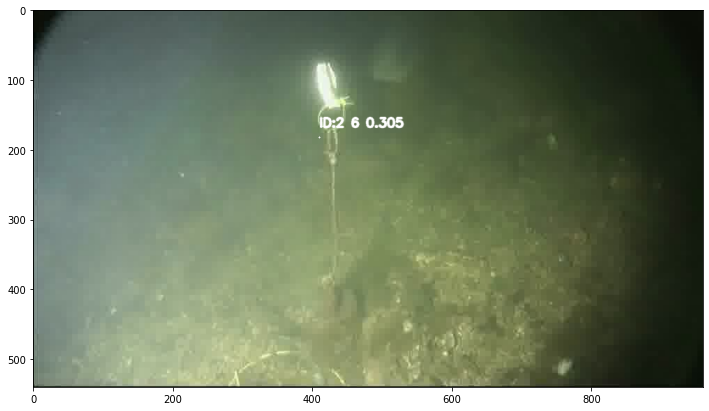

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.imshow(cv2.cvtColor(debug_image, cv2.COLOR_BGR2RGB) )


#Float16 Inference

In [71]:
interpreter = tf.lite.Interpreter(model_path='model_fp16.tflite', num_threads=1)
interpreter.allocate_tensors()

In [72]:
input_details = interpreter.get_input_details()
print(input_details)

[{'name': 'serving_default_images:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [73]:
output_details = interpreter.get_output_details()
print(output_details)

[{'name': 'StatefulPartitionedCall:1', 'index': 526, 'shape': array([ 1, 25], dtype=int32), 'shape_signature': array([ 1, 25], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:3', 'index': 524, 'shape': array([ 1, 25,  4], dtype=int32), 'shape_signature': array([ 1, 25,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:0', 'index': 527, 'shape': array([1], dtype=int32), 'shape_signature': array([1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array(

In [74]:
class_labels = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
    class_labels[label_id-1] = label_name

print(class_labels) 

['7', '2', '6', '1', '5', '3', '4']


In [75]:
def run_inference_fp16_single_image(
        interpreter,
        input_image,
        input_shape=(320, 320),
):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    x = input_image[:, :, [2, 1, 0]]  # BGR2RGB
    x = cv2.resize(x, (input_shape[0], input_shape[1]))
    x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
    x = x.astype(np.float32)
    x /= 255.0

    interpreter.set_tensor(input_details[0]['index'], x)
    interpreter.invoke()

    boxes = interpreter.get_tensor(output_details[1]['index'])
    classes = interpreter.get_tensor(output_details[3]['index'])
    scores = interpreter.get_tensor(output_details[0]['index'])
    num = interpreter.get_tensor(output_details[2]['index'])

    return np.squeeze(boxes), np.squeeze(classes), np.squeeze(scores), int(num[0])
     

In [76]:
test_image = cv2.imread('dataset/400.jpg')


In [77]:
bboxes, classes, scores, num = run_inference_fp16_single_image(
    interpreter,
    test_image
)

In [78]:
import copy

score_th = 0.3

debug_image = copy.deepcopy(test_image)
debug_image_width, debug_image_height = debug_image.shape[1], debug_image.shape[0]

for i in range(num):
    score = scores[i]
    bbox = bboxes[i]
    class_id = classes[i].astype(np.int)

    if score < score_th:
        continue

    x1, y1 = int(bbox[1] * debug_image_width), int(bbox[0] * debug_image_height)
    x2, y2 = int(bbox[3] * debug_image_width), int(bbox[2] * debug_image_height)

    cv2.putText(
        debug_image, 'ID:' + str(class_id) + ' ' +
        class_labels[class_id] + ' ' + '{:.3f}'.format(score),
        (x1, y1 - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2,
        cv2.LINE_AA)
    cv2.rectangle(debug_image, (x1, y1), (x2, y2), (255, 255, 255), 2)
     

<ipython-input-78-2ca4d3207c76>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  class_id = classes[i].astype(np.int)


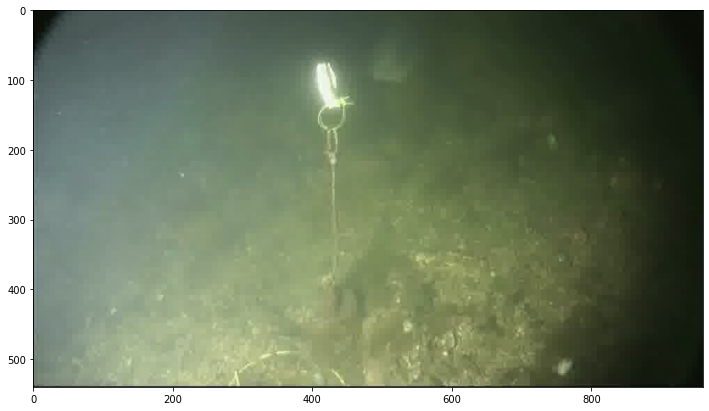

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.imshow(cv2.cvtColor(debug_image, cv2.COLOR_BGR2RGB) )